# Explore Telecom Customer dataset and build predictive models for churn



In [1]:
import pandas as pd
import numpy as np 
#%matplotlib widget
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
import seaborn as sns  
import scipy.stats as sta
import pickle
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")
sns.set_palette("viridis", 3)

### Load and Clean data

In [2]:
path = r'E:\DATA\tele_cus\telecom_customers.csv'
df = pd.read_csv(path)
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerID        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [4]:
df.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

####  Convert TotalCharges column to numeric

In [5]:
def convert_to_numeric (feature) :
    df[feature] =pd.to_numeric(df[feature], errors = 'coerce')
    
convert_to_numeric('TotalCharges')

In [6]:
df.isnull().sum()

Unnamed: 0           0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df.drop(['Unnamed: 0','customerID'], axis =1, inplace=True)

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7043,3,No,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Missing value treatment 

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
df.loc[:, 'TotalCharges'] = imputer.fit_transform(df.loc[:, 'TotalCharges'].values.reshape(-1,1))

In [10]:
print(df.isnull().values.any())
df.isnull().sum()

False


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Categorize Features to categorical values and continuous values

In [12]:
df.SeniorCitizen = df.SeniorCitizen.astype('str')
string_fields = [type(fld) is str for fld in df.iloc[0, :]]
all_features = [x for x in df.columns if x != 'Churn']
categorical_features = [x[1] for x in zip(string_fields, all_features) if x[0] is True ]
continues_features = [x for x in all_features if x not in categorical_features]

## Exploratory Data Analysis

Churn
No     5174
Yes    1869
dtype: int64


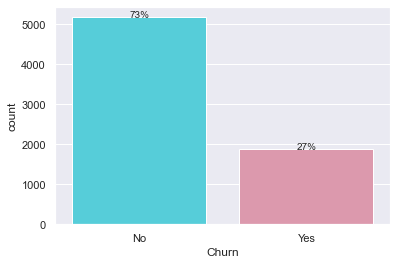

In [13]:
print(df.groupby(['Churn']).size())
color_0_1 = ('#40DFEF', '#E78EA9')
churn_plot = sns.countplot(data=df, x='Churn',palette=color_0_1)#, order=df.Churn.value_counts().index)
for p in churn_plot.patches :
    height = p.get_height()
    churn_plot.text(p.get_x()+p.get_width()/2, height, '{0:.0%}'.format(height/len(df)), ha='center')
plt.show()

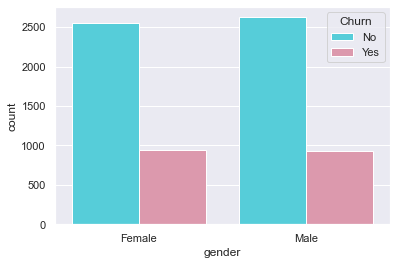

In [14]:
gender_churn_plot = sns.countplot(data=df, x='gender', hue='Churn',palette=color_0_1)
plt.show()

There is no much difference in Genere base customer

### Count plots for  all categorical features 

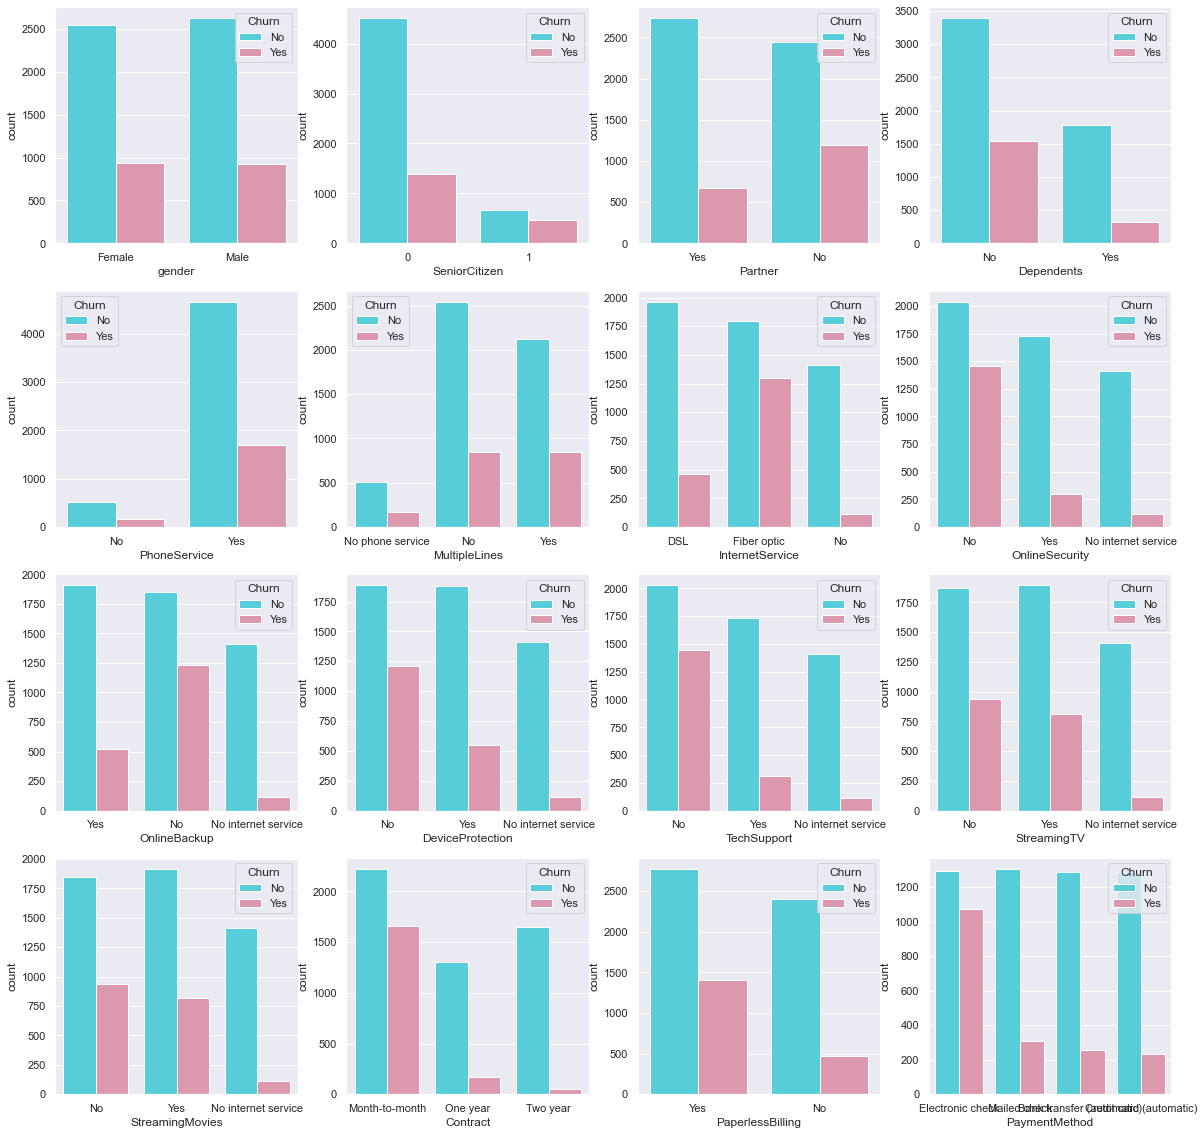

In [15]:
f, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16)) = plt.subplots(4, 4, figsize=(20, 20))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16]

for i in range(len(categorical_features)):
    sns.countplot(x = categorical_features[i], hue="Churn", data=df, ax=ax[i], palette=color_0_1)

### Continuous feature histograms

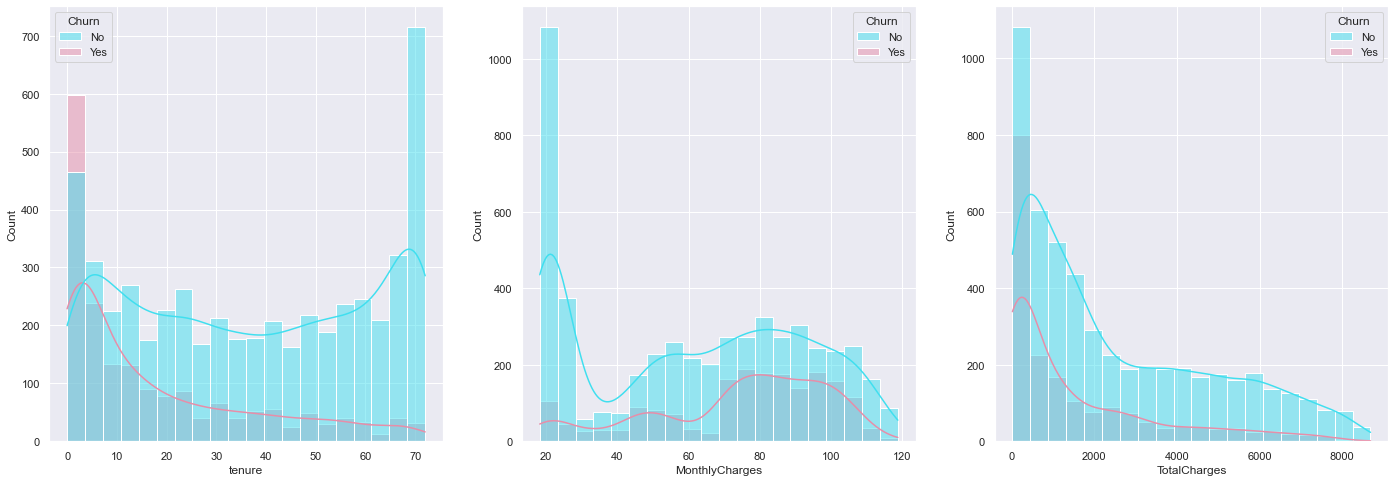

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(24,8))
for i, p in enumerate(continues_features) :
        sns.histplot(data=df, x=p, ax=ax[i], hue='Churn', bins=20, kde=True, palette=color_0_1)
          

### Pairwise relationships

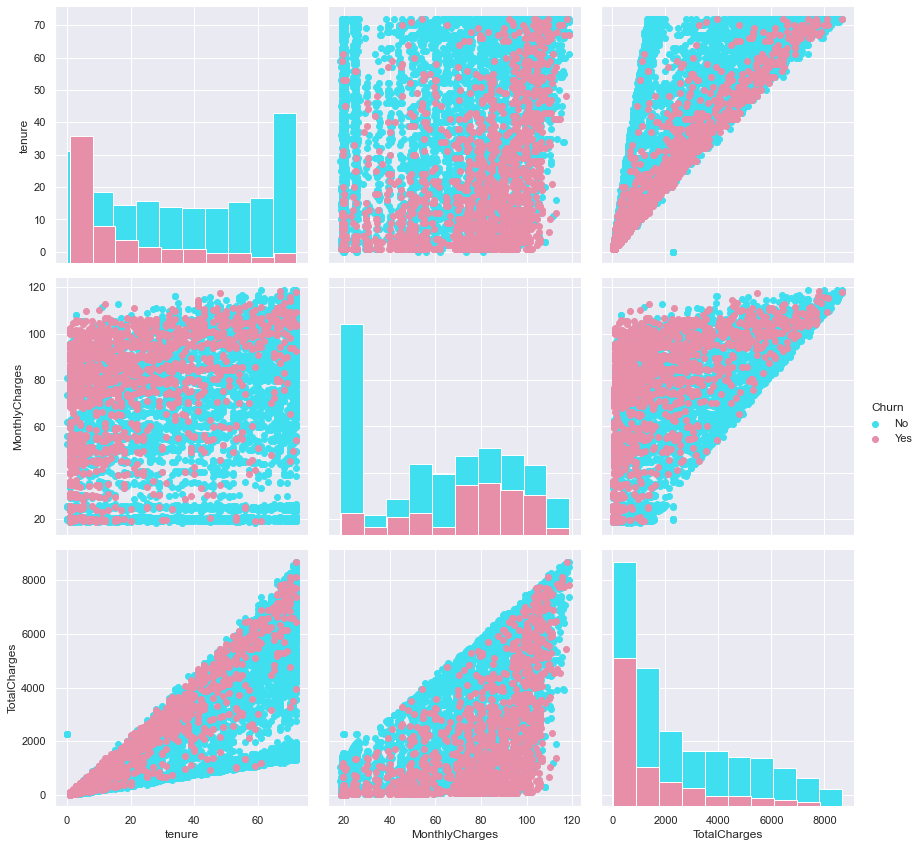

In [17]:
grid = sns.PairGrid(df, hue='Churn', height=4,palette=color_0_1)
grid = grid.map_diag(plt.hist)
grid = grid.map_offdiag(plt.scatter)
grid = grid.add_legend()

Tenure has opposite effect on Churn "Yes" or "No". Churn customers have minimum tenure, where in no churn customers prefer longer tenure

### Box plots for numerical columns

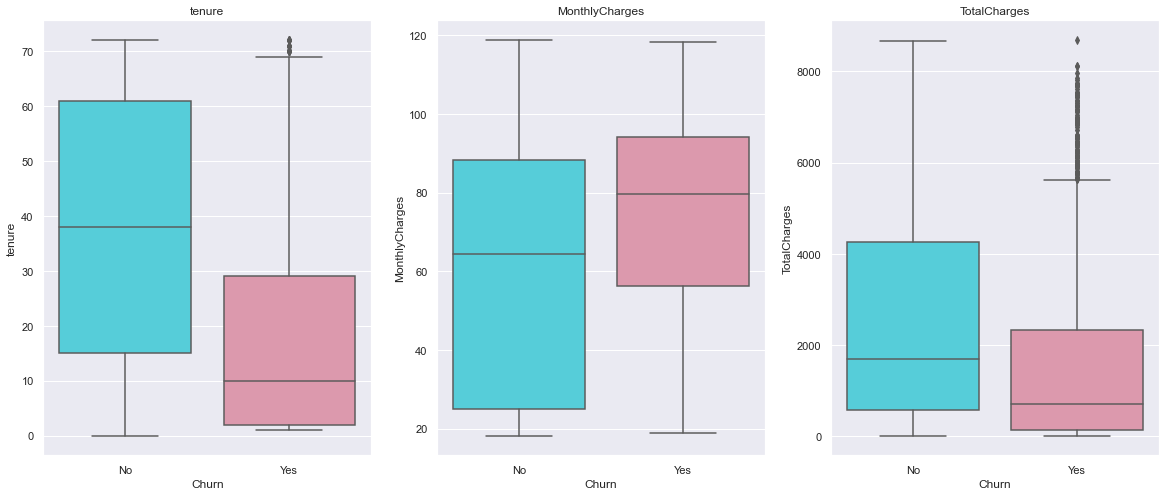

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))
for i, p in enumerate(continues_features) :
        sns.boxplot(data=df, x='Churn', y=p, ax=ax[i], palette=color_0_1)
        ax[i].set_title(p)

### Pearson (linear) correlation

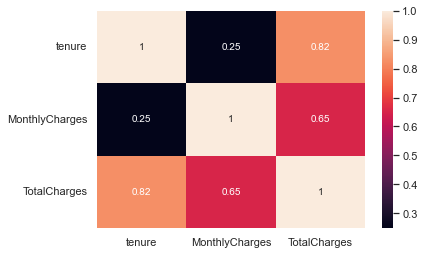

In [19]:
sns.heatmap(data= df.corr(method='pearson'), annot=True)
plt.show()

In [20]:
df.groupby('Churn')[['MonthlyCharges', 'tenure', 'TotalCharges']].mean().round(2)

,MonthlyCharges,tenure,TotalCharges
Churn,,,
No,61.27,37.57,2554.77
Yes,74.44,17.98,1531.80


## Data pre-processing:

Encode a string column of labels to a column of label indices

In [21]:
df.replace('Yes', 1, inplace=True)
df.replace('No', 0, inplace=True)
df.replace('No internet service', 0, inplace=True)
df.replace('No phone service', 0, inplace=True)
df.replace('Fiber optic', 2, inplace=True)
df.replace('DSL',1, inplace=True)
df.replace('Male',1, inplace=True)
df.replace('Female',0, inplace=True)
df['SeniorCitizen'] = df['SeniorCitizen'].astype('int64')
df = pd.get_dummies(data=df, columns=['Contract', 'PaymentMethod'])

In [22]:
df.head().T

,0,1,2,3,4
gender,0.00,1.00,1.00,1.00,0.00
SeniorCitizen,0.00,0.00,0.00,0.00,0.00
Partner,1.00,0.00,0.00,0.00,0.00
Dependents,0.00,0.00,0.00,0.00,0.00
tenure,1.00,34.00,2.00,45.00,2.00
PhoneService,0.00,1.00,1.00,0.00,1.00
MultipleLines,0.00,0.00,0.00,0.00,0.00
InternetService,1.00,1.00,1.00,1.00,2.00
OnlineSecurity,0.00,1.00,1.00,1.00,0.00
OnlineBackup,1.00,0.00,1.00,0.00,0.00


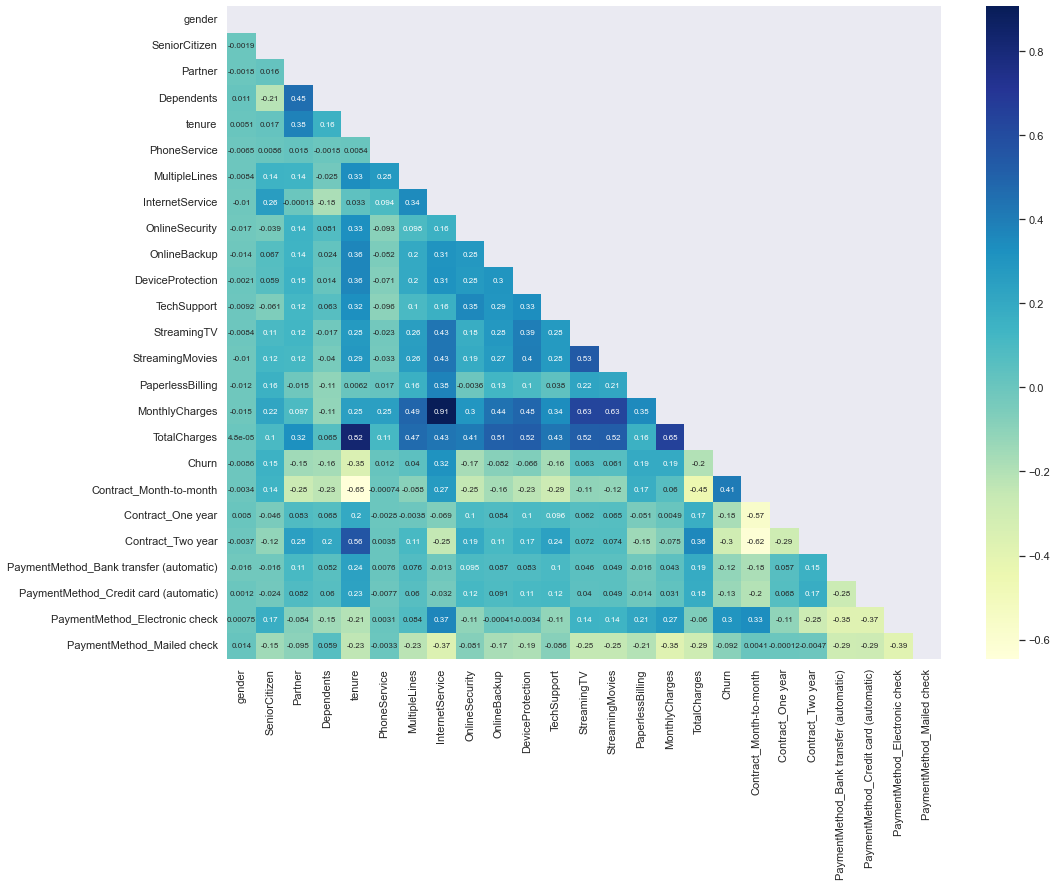

In [23]:
ones = np.ones_like(df.corr())
mask = np.triu(ones)
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), mask=mask,annot=True, cmap="YlGnBu", annot_kws={'fontsize':8});

In [24]:
X = df.drop('Churn', axis=1)
X.sort_index(axis=1, inplace=True)
y = df['Churn']
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [25]:
"""
sample_df = pd.concat([df[df['Churn']==0].sample(1869), df[df['Churn']==1]])
X = sample_df.drop('Churn', axis=1)
X.sort_index(axis=1, inplace=True)
y = sample_df['Churn']
y.value_counts()
"""

"\nsample_df = pd.concat([df[df['Churn']==0].sample(1869), df[df['Churn']==1]])\nX = sample_df.drop('Churn', axis=1)\nX.sort_index(axis=1, inplace=True)\ny = sample_df['Churn']\ny.value_counts()\n"

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import auc, roc_curve 

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

In [28]:
print(f'x_train Length : {len(x_train)}')
print(f'x_test Length : {len(x_test)}')
print(f'y_train value counts : {y_train.value_counts(normalize=True)}')
print(f'y_test value counts : {y_test.value_counts(normalize=True)}')

x_train Length : 4930
x_test Length : 2113
y_train value counts : 0    0.734686
1    0.265314
Name: Churn, dtype: float64
y_test value counts : 0    0.734501
1    0.265499
Name: Churn, dtype: float64


In [29]:
Scaler = MinMaxScaler()
x_train[continues_features] = Scaler.fit_transform(x_train[continues_features])
x_test[continues_features] = Scaler.transform(x_test[continues_features])
pickle.dump(Scaler, open('scaler.sav', 'wb'))

# Create a model

In [30]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier,\
                             GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
#
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
#
from imblearn.over_sampling import SMOTE 

# Over Sampling Method

In [31]:
x_smote_train = x_train.copy()
y_smote_train = y_train.copy()
x_smote_train, y_smote_train = SMOTE(random_state=123).fit_resample(x_smote_train, y_smote_train) 
print(f'x_train Length : {len(x_train)}')
print(f'x_smote Length : {len(x_smote_train)}')
print(f'y_train value counts : {y_train.value_counts(normalize=True)}')
print(f'y_smote value counts : {y_smote_train.value_counts(normalize=True)}')

x_train Length : 4930
x_smote Length : 7244
y_train value counts : 0    0.734686
1    0.265314
Name: Churn, dtype: float64
y_smote value counts : 0    0.5
1    0.5
Name: Churn, dtype: float64


### Support Vector Machine Model

In [ ]:
svm_model = SVC(C=1, kernel='rbf',gamma=0.1)
svm_model.fit(x_train, y_train)
print(f'Accuracy for train model : {svm_model.score(x_train, y_train)}')
y_pred_t = svm_model.predict(x_train)
y_pred = svm_model.predict(x_test)
print(f'Accuracy for test model : {accuracy_score(y_test, y_pred)}')
print(classification_report(y_train, y_pred_t))
print(classification_report(y_test, y_pred))

Accuracy for train model : 0.9640973630831643
Accuracy for test model : 0.7624230951254141
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3622
           1       0.96      0.90      0.93      1308

    accuracy                           0.96      4930
   macro avg       0.96      0.94      0.95      4930
weighted avg       0.96      0.96      0.96      4930

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      1552
           1       0.76      0.15      0.26       561

    accuracy                           0.76      2113
   macro avg       0.76      0.57      0.56      2113
weighted avg       0.76      0.76      0.70      2113



Accuracy score for the Train data is very high but in Test data is low. which means the model is **overfitted** on Training data.  

#### with SMOTE data

In [ ]:
svm_model = SVC(C=0.1, kernel='rbf',gamma=0.1)
svm_model.fit(x_smote_train, y_smote_train)
print(f'Accuracy for train model : {svm_model.score(x_smote_train, y_smote_train)}')
y_pred_t = svm_model.predict(x_smote_train)
y_pred = svm_model.predict(x_test)
print(f'Accuracy for test model : {accuracy_score(y_test, y_pred)}')
print(classification_report(y_smote_train, y_pred_t))
print(classification_report(y_test, y_pred))

Accuracy for train model : 0.5802043070127002
Accuracy for test model : 0.7524846190250828
              precision    recall  f1-score   support

           0       0.55      0.96      0.70      3622
           1       0.83      0.20      0.33      3622

    accuracy                           0.58      7244
   macro avg       0.69      0.58      0.51      7244
weighted avg       0.69      0.58      0.51      7244

              precision    recall  f1-score   support

           0       0.76      0.96      0.85      1552
           1       0.62      0.17      0.27       561

    accuracy                           0.75      2113
   macro avg       0.69      0.57      0.56      2113
weighted avg       0.73      0.75      0.70      2113



### Select Best Classifier

In [ ]:
clf = [AdaBoostClassifier(), RandomForestClassifier(), 
       GradientBoostingClassifier(), XGBClassifier(), 
       StackingClassifier(estimators=[('SVM', svm_model), ('RF', RandomForestClassifier()),
                                      ('XGB', XGBClassifier(gamma=0.001, n_estimators=50))],
                                       final_estimator=LogisticRegression(C=1))]
for model in clf :
    print(f'{model} score :')
    print(f"{cross_val_score(model, x_train, y_train, cv =4, scoring='accuracy').mean()}\n") 

AdaBoostClassifier() score :
0.7991886409736308

RandomForestClassifier() score :
0.7855983772819471

GradientBoostingClassifier() score :
0.798580121703854

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...) score :
0.7847870182555782

StackingClassifier(estimators=[('SVM', SVC(C=1, gamma=0.1)),
            

#### with SMOTE data

In [ ]:
clf = [AdaBoostClassifier(), RandomForestClassifier(), 
       GradientBoostingClassifier(), XGBClassifier(), 
       StackingClassifier(estimators=[('SVM', svm_model), ('RF', RandomForestClassifier()),
                                      ('XGB', XGBClassifier(gamma=0.001, n_estimators=50))],
                                       final_estimator=LogisticRegression(C=1))]
for model in clf :
    print(f'{model} score :')
    print(f"{cross_val_score(model, x_smote_train, y_smote_train, cv =4, scoring='f1').mean()}\n")


AdaBoostClassifier() score :
0.8121693110790813

RandomForestClassifier() score :
0.822574965403247

GradientBoostingClassifier() score :
0.8181903545604656

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...) score :
0.8129872138407048

StackingClassifier(estimators=[('SVM', SVC(C=0.1, gamma=0.1)),
          

In [ ]:
for model in clf :
    print('Results for : ', model)
    model.fit(x_train, y_train)
    print(f'Accuracy for train data : {model.score(x_train, y_train)}')
    y_pred = model.predict(x_test)
    print(f'Accuracy for test data : {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))

Results for :  AdaBoostClassifier()
Accuracy for train data : 0.8089249492900609
Accuracy for test data : 0.8045433033601515
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1552
           1       0.67      0.52      0.58       561

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.79      0.80      0.80      2113

Results for :  RandomForestClassifier()
Accuracy for train data : 0.9977687626774848
Accuracy for test data : 0.7974443918599148
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1552
           1       0.66      0.50      0.57       561

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113

Results for :  GradientBoostingClassifier()
Accuracy for train data : 0.8286004056795132
Acc

In [ ]:
for model in clf :
    print('Results for : ', model)
    model.fit(x_smote_train, y_smote_train)
    print(f'Accuracy for train data : {model.score(x_smote_train, y_smote_train)}')
    y_pred = model.predict(x_test)
    print(f'Accuracy for test data : {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))


Results for :  AdaBoostClassifier()
Accuracy for train data : 0.8475980121479846
Accuracy for test data : 0.7756743965925225
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1552
           1       0.57      0.66      0.61       561

    accuracy                           0.78      2113
   macro avg       0.72      0.74      0.73      2113
weighted avg       0.79      0.78      0.78      2113

Results for :  RandomForestClassifier()
Accuracy for train data : 0.9983434566537824
Accuracy for test data : 0.7799337434926644
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1552
           1       0.59      0.57      0.58       561

    accuracy                           0.78      2113
   macro avg       0.72      0.71      0.72      2113
weighted avg       0.78      0.78      0.78      2113

Results for :  GradientBoostingClassifier()
Accuracy for train data : 0.8648536720044174
Acc

# Ada Boost

In [ ]:
Ada_param = {'n_estimators' : [80, 100, 150],
            'learning_rate': [0.001,0.01, 1]}
Ada_model = AdaBoostClassifier()
ADA_GS = GridSearchCV(Ada_model, Ada_param, cv=3, scoring='accuracy')
ADA_GS.fit(x_smote_train, y_smote_train)
ADA_GS.best_params_

{'learning_rate': 1, 'n_estimators': 150}

In [ ]:
print(f'Accuracy for train data : {ADA_GS.score(x_smote_train, y_smote_train)}')
y_pred = ADA_GS.predict(x_test)
print(f'Accuracy for test data : {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy for train data : 0.8558807288790723
Accuracy for test data : 0.7875059157595835
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1552
           1       0.59      0.63      0.61       561

    accuracy                           0.79      2113
   macro avg       0.73      0.74      0.73      2113
weighted avg       0.79      0.79      0.79      2113



# Random Forest

In [ ]:
rf_param = {'criterion' : ['gini'],
              'n_estimators' : [50, 80, 100],
              'min_samples_split': [5,10],
              'max_depth': [3],
              'max_features': [3,5,7],
              'class_weight':[ {0:0.3, 1:0.7}, {0:0.25, 1:0.75},{0:0.22, 1:0.78}]}

RF_model = RandomForestClassifier(random_state=123)
RF_GS = GridSearchCV(RF_model, rf_param, cv=3, scoring='f1')
RF_GS.fit(x_train, y_train)
print(RF_GS.best_params_)
print(f'Accuracy for train data : {RF_GS.score(x_train, y_train)}')
y_pred = RF_GS.predict(x_test)
print(f'Accuracy for test data : {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

{'class_weight': {0: 0.3, 1: 0.7}, 'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 80}
Accuracy for train data : 0.6403339755940912
Accuracy for test data : 0.7723615712257453
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1552
           1       0.55      0.75      0.63       561

    accuracy                           0.77      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.77      0.78      2113



### With SMOTE

In [ ]:
rf_param = {'criterion' : ['gini'],
              'n_estimators' : [50, 80, 100],
              'min_samples_split': [5,10],
              'max_depth': [3],
              'max_features': [3,5,7],
              'class_weight':[ {0:0.5, 1:0.5}, {0:0.3, 1:0.7}, {0:0.2, 1:0.8}]}

RF_model_ = RandomForestClassifier(random_state=123)
RF_GS_ = GridSearchCV(RF_model_, rf_param, cv=3, scoring='f1')
RF_GS_.fit(x_smote_train, y_smote_train)
y_train_pred = RF_GS_.predict(x_smote_train)
print(RF_GS_.best_params_)
print(f'Accuracy for train data : {accuracy_score(y_smote_train, y_train_pred)}')
y_pred = RF_GS_.predict(x_test)
print(f'Accuracy for test data : {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

{'class_weight': {0: 0.5, 1: 0.5}, 'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy for train data : 0.7754003313086693
Accuracy for test data : 0.7401798390913393
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1552
           1       0.51      0.80      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.75      2113



# Best RF

In [ ]:
rf_param = {'criterion' : 'gini',
              'n_estimators' : 80,
              'min_samples_split': 5,
              'max_depth': 3,
              'max_features': 3,
              'class_weight':{0:0.3, 1:0.7}}

RF_model = RandomForestClassifier(**rf_param, random_state=123)
RF_model.fit(x_train, y_train)
print(f'Accuracy for train data : {RF_model.score(x_train, y_train)}')
y_pred = RF_model.predict(x_test)
print(f'Accuracy for test data : {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy for train data : 0.7728194726166329
Accuracy for test data : 0.7723615712257453
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1552
           1       0.55      0.75      0.63       561

    accuracy                           0.77      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.77      0.78      2113



### Feature engineering

                                     f_name     f_imp
23                                   tenure  0.181179
0                   Contract_Month-to-month  0.145822
5                           InternetService  0.116899
2                         Contract_Two year  0.111723
6                            MonthlyCharges  0.094414
14           PaymentMethod_Electronic check  0.071126
21                             TotalCharges  0.065289
1                         Contract_One year  0.037240
10                         PaperlessBilling  0.033000
9                            OnlineSecurity  0.032479
20                              TechSupport  0.026023
3                                Dependents  0.013415
12  PaymentMethod_Bank transfer (automatic)  0.011459
11                                  Partner  0.009906
13    PaymentMethod_Credit card (automatic)  0.008845
17                            SeniorCitizen  0.007370
4                          DeviceProtection  0.007080
15               PaymentMeth

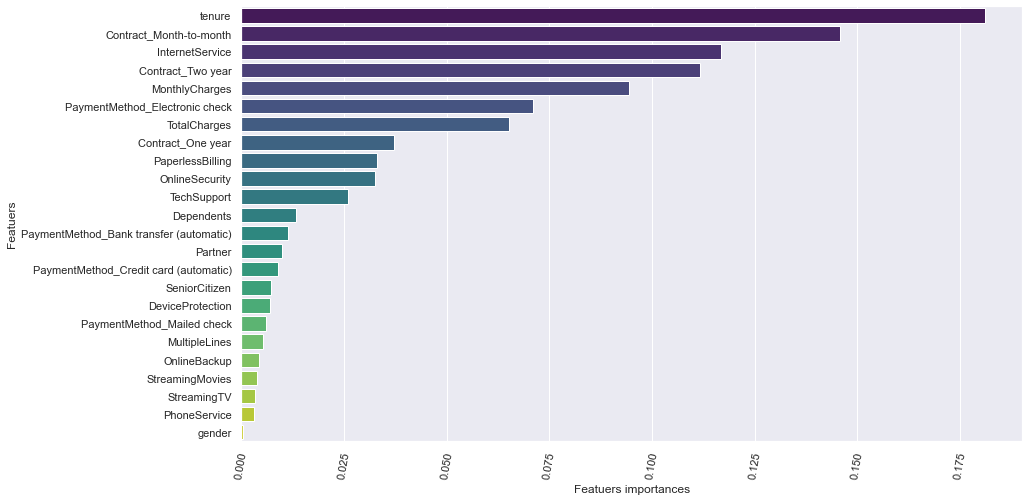

In [ ]:
feat_name = X.columns.to_list()
feat_imp = RF_model.feature_importances_
feat_df = pd.DataFrame({'f_name':feat_name, 'f_imp':feat_imp}).sort_values(by='f_imp', ascending=False)
print(feat_df)
plt.figure(figsize=(14,8))
sns.barplot(x='f_imp', y='f_name', data=feat_df, palette='viridis')
plt.xlabel('Featuers importances')
plt.ylabel('Featuers')
plt.xticks(rotation=80);

In [ ]:
drop_f = feat_df[feat_df.f_imp<0.001]['f_name'].tolist()
print(drop_f)
new_X = X.loc[:,~X.columns.isin(drop_f)]
x_train_new = x_train.drop(drop_f, axis=1)
x_test_new = x_test.drop(drop_f, axis=1)
print(f'x_train Length : {x_train_new.shape}')
print(f'x_test Length : {x_test_new.shape}')
print(f'y_train value counts : {y_train.value_counts()}')
print(f'y_test value counts : {y_test.value_counts()}')

['gender']
x_train Length : (4930, 23)
x_test Length : (2113, 23)
y_train value counts : 0    3622
1    1308
Name: Churn, dtype: int64
y_test value counts : 0    1552
1     561
Name: Churn, dtype: int64


In [ ]:
rf_param = {'criterion' : 'gini',
              'n_estimators' : 80,
              'min_samples_split': 5,
              'max_depth': 3,
              'max_features': 3,
              'class_weight':{0:0.3, 1:0.7}}

RF_model = RandomForestClassifier(**rf_param, random_state=123)
RF_model.fit(x_train_new, y_train)
print(f'Accuracy for train data : {RF_model.score(x_train_new, y_train)}')
y_pred = RF_model.predict(x_test_new)
y_proba = RF_model.predict_proba(x_test_new)
print(f'Accuracy for test data : {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy for train data : 0.7517241379310344
Accuracy for test data : 0.7520113582584004
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1552
           1       0.52      0.80      0.63       561

    accuracy                           0.75      2113
   macro avg       0.72      0.77      0.72      2113
weighted avg       0.81      0.75      0.76      2113



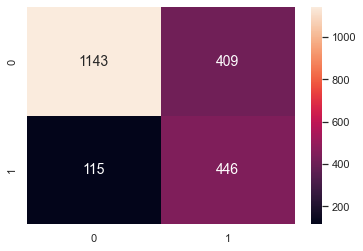

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', annot_kws={'fontsize':14});

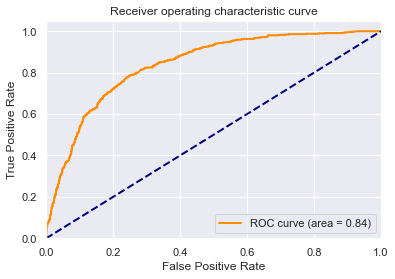

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_proba[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

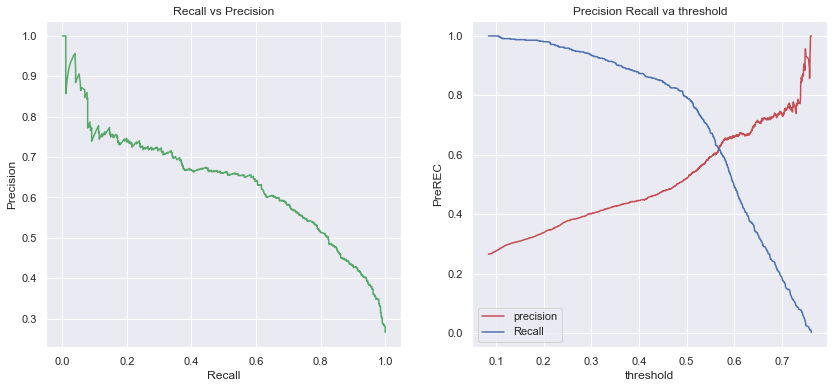

In [ ]:
per, rec, thr=precision_recall_curve(y_test, y_proba[:,1])
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(rec, per, c='g')
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('Recall vs Precision')
#
ax2.plot(thr, per[:-1], c='r', label='precision')
ax2.plot(thr, rec[:-1], c='b', label='Recall')
ax2.set_title('Precision Recall va threshold')
ax2.set_xlabel('threshold')
ax2.set_ylabel('PreREC')
ax2.legend()
plt.show()

In [ ]:
pickle.dump(RF_model, open('RF_model.sav', 'wb'))

In [ ]:
threshold = np.linspace(0.491,0.494,10)
for i in threshold :
    
    y_pred_ = y_proba[:,1]>=i
    y_pred_ = y_pred_.astype('int64')
    print(f'Classification Report for {i} treshold')
    print(classification_report(y_test, y_pred_))

### Feature selection with SMOTE

In [ ]:
rf_param = {'criterion' : 'gini',
              'n_estimators' : 100,
              'min_samples_split': 5,
              'max_depth': 3,
              'max_features': 3,
              'class_weight': {0:0.5, 1:0.5}
}

RF_model_ = RandomForestClassifier(**rf_param, random_state=123)
RF_model_.fit(x_smote_train, y_smote_train)
print(f'Accuracy for train data : {RF_model_.score(x_smote_train, y_smote_train)}')
y_pred = RF_model_.predict(x_test)
print(f'Accuracy for test data : {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy for train data : 0.7754003313086693
Accuracy for test data : 0.7401798390913393
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1552
           1       0.51      0.80      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.75      2113



                                     f_name     f_imp
23                                   tenure  0.173576
2                         Contract_Two year  0.127398
0                   Contract_Month-to-month  0.117249
5                           InternetService  0.108521
6                            MonthlyCharges  0.080499
9                            OnlineSecurity  0.070393
14           PaymentMethod_Electronic check  0.064564
20                              TechSupport  0.050687
21                             TotalCharges  0.048223
1                         Contract_One year  0.048168
3                                Dependents  0.033873
11                                  Partner  0.018858
10                         PaperlessBilling  0.014774
15               PaymentMethod_Mailed check  0.008047
8                              OnlineBackup  0.006897
12  PaymentMethod_Bank transfer (automatic)  0.006764
13    PaymentMethod_Credit card (automatic)  0.004882
18                          

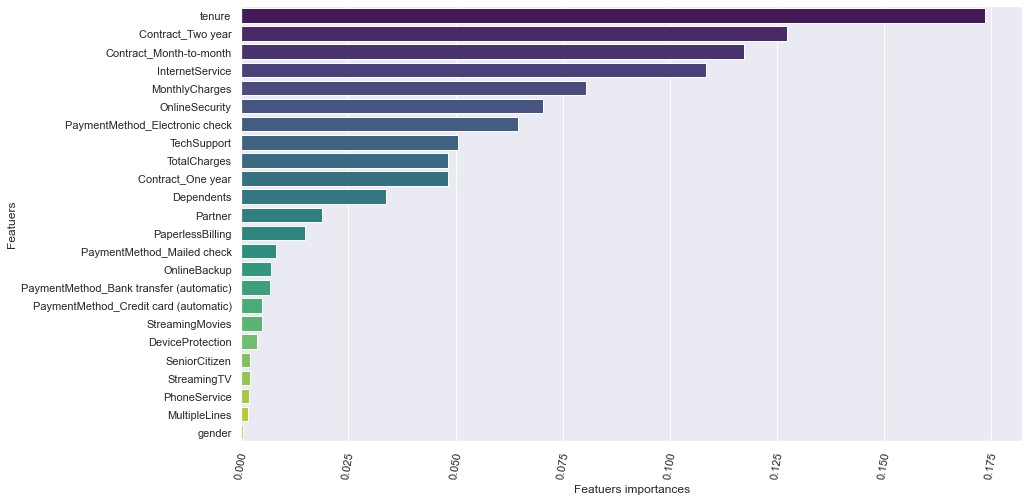

In [ ]:
feat_name = X.columns.to_list()
feat_imp = RF_model_.feature_importances_
feat_df = pd.DataFrame({'f_name':feat_name, 'f_imp':feat_imp}).sort_values(by='f_imp', ascending=False)
print(feat_df)
plt.figure(figsize=(14,8))
sns.barplot(x='f_imp', y='f_name', data=feat_df, palette='viridis')
plt.xlabel('Featuers importances')
plt.ylabel('Featuers')
plt.xticks(rotation=80);

In [ ]:
drop_f = feat_df[feat_df.f_imp<0.001]['f_name'].tolist()
print(drop_f)
x_smote_train_new = x_smote_train.drop(drop_f, axis=1)
x_test_new = x_test.drop(drop_f, axis=1)
print(f'x_train Length : {x_smote_train_new.shape}')
print(f'x_test Length : {x_test_new.shape}')
print(f'y_train value counts : {y_smote_train.value_counts()}')
print(f'y_test value counts : {y_test.value_counts()}')
#

['gender']
x_train Length : (7244, 23)
x_test Length : (2113, 23)
y_train value counts : 0    3622
1    3622
Name: Churn, dtype: int64
y_test value counts : 0    1552
1     561
Name: Churn, dtype: int64


In [ ]:
rf_param = {'criterion' : 'gini',
              'n_estimators' : 100,
              'min_samples_split': 5,
              'max_depth': 3,
              'max_features': 3,
              'class_weight': {0:0.5, 1:0.5}
}

RF_model_ = RandomForestClassifier(**rf_param, random_state=123)
RF_model_.fit(x_smote_train_new, y_smote_train)
print(f'Accuracy for train data : {RF_model_.score(x_smote_train_new, y_smote_train)}')
y_pred = RF_model_.predict(x_test_new)
print(f'Accuracy for test data : {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy for train data : 0.7678078409718387
Accuracy for test data : 0.7302413629910081
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1552
           1       0.50      0.82      0.62       561

    accuracy                           0.73      2113
   macro avg       0.70      0.76      0.70      2113
weighted avg       0.80      0.73      0.75      2113



# Best Random Forest MOdel :
- Model with class wighting method after feature selection have beter performance 

# XGBoost Hyperparameters tuning 

In [ ]:
XGB_param = {'booster' : ['gbtree'],
              'n_estimators' : [50, 80, 100],
              'gamma': [0.001,0.01],
              'max_depth': [3],
              'subsample':[1],
              'scale_pos_weight':[ 2, 3, 4, 5]}

XGB_model = XGBClassifier(seed=123)
XGB_GS = GridSearchCV(XGB_model, XGB_param, cv=3, scoring='f1')
XGB = XGB_GS.fit(x_train, y_train)
print(XGB_GS.best_params_)
y_train_pred = XGB_GS.predict(x_train)
print(f'f1 Score for train data : {XGB.score(x_train, y_train)}')
y_pred = XGB.predict(x_test)
print(f'Accuracy for test data : {accuracy_score(y_train, y_train_pred)}')
print(f'Accuracy for test data : {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

{'booster': 'gbtree', 'gamma': 0.001, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 4, 'subsample': 1}
f1 Score for train data : 0.6625971143174251
Accuracy for test data : 0.7533468559837728
Accuracy for test data : 0.7250354945575012
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1552
           1       0.49      0.84      0.62       561

    accuracy                           0.73      2113
   macro avg       0.71      0.76      0.70      2113
weighted avg       0.81      0.73      0.74      2113



#### With SMOTE

In [ ]:
XGB_param = {'booster' : ['gbtree'],
              'n_estimators' : [50, 80, 100],
              'gamma': [0.001,0.01],
              'max_depth': [3],
              'subsample':[1],
              'scale_pos_weight':[1, 2, 3]}

XGB_model = XGBClassifier(seed=123)
XGB_GS = GridSearchCV(XGB_model, XGB_param, cv=3, scoring='f1')
XGB = XGB_GS.fit(x_smote_train, y_smote_train)
print(XGB.best_params_)
y_train_pred = XGB.predict(x_smote_train)
print(f'f1 Score for train data : {XGB.score(x_smote_train, y_smote_train)}')
y_pred = XGB.predict(x_test)
print(f'Accuracy for test data : {accuracy_score(y_smote_train, y_train_pred)}')
print(f'Accuracy for test data : {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

{'booster': 'gbtree', 'gamma': 0.001, 'max_depth': 3, 'n_estimators': 80, 'scale_pos_weight': 2, 'subsample': 1}
f1 Score for train data : 0.8502713369511594
Accuracy for test data : 0.8324130314743236
Accuracy for test data : 0.7198296261239944
              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1552
           1       0.48      0.81      0.61       561

    accuracy                           0.72      2113
   macro avg       0.70      0.75      0.69      2113
weighted avg       0.80      0.72      0.74      2113



#### GradeientBoosting Classifier seems to work better compared to other models

In [ ]:
XGB_param = {'booster' : 'gbtree',
              'n_estimators' : 50,
              'gamma': 0.001,
              'max_depth': 3,
              'subsample':1,
              'scale_pos_weight': 3}
XGB_model = XGBClassifier(**XGB_param , seed=125)   
XGB_model.fit(x_train, y_train)
y_pred = XGB_model.predict(x_test)
y_proba = XGB_model.predict_proba(x_test)
print(classification_report(y_test, y_pred))          

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1552
           1       0.52      0.80      0.63       561

    accuracy                           0.75      2113
   macro avg       0.71      0.77      0.72      2113
weighted avg       0.81      0.75      0.76      2113



#### SMOTE

In [ ]:
XGB_param = {'booster' : 'gbtree',
              'n_estimators' : 50,
              'gamma': 0.001,
              'max_depth': 3,
              'subsample':1,
              'scale_pos_weight': 1.4}
XGB_model_ = XGBClassifier(**XGB_param , seed=125)   
XGB_model_.fit(x_smote_train, y_smote_train)
y_pred = XGB_model_.predict(x_test)
y_proba = XGB_model_.predict_proba(x_test)
print(classification_report(y_test, y_pred))   

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1552
           1       0.51      0.80      0.63       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113



In [ ]:
treshold = np.linspace(0.4,0.5,10)
for i in treshold :
    
    y_pred_ = y_proba[:,1]>=i
    y_pred_ = y_pred_.astype('int64')
    print(f'Classification Report for {i} treshold')
    print(classification_report(y_test, y_pred_))

# Working with feature importances

                                     f_name     f_imp
0                   Contract_Month-to-month  0.594776
5                           InternetService  0.122288
14           PaymentMethod_Electronic check  0.034214
1                         Contract_One year  0.031872
2                         Contract_Two year  0.029087
18                          StreamingMovies  0.028750
23                                   tenure  0.022168
16                             PhoneService  0.015035
10                         PaperlessBilling  0.014111
9                            OnlineSecurity  0.013724
20                              TechSupport  0.012107
12  PaymentMethod_Bank transfer (automatic)  0.009830
6                            MonthlyCharges  0.009542
17                            SeniorCitizen  0.008388
19                              StreamingTV  0.007766
3                                Dependents  0.007508
21                             TotalCharges  0.007327
15               PaymentMeth

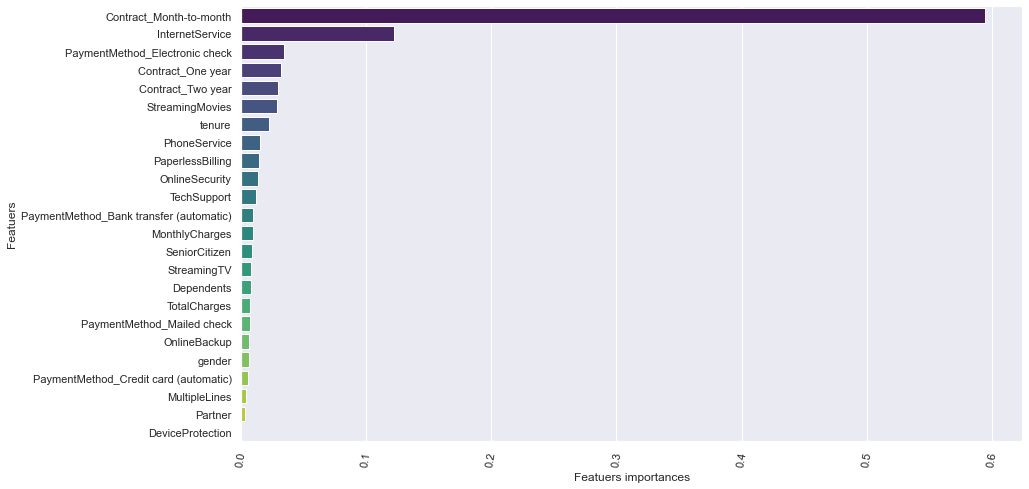

In [ ]:
#sns.set_theme(context='notebook', style='darkgrid', palette='deep')
feat_name = X.columns.to_list()
featu_imp = XGB_model.feature_importances_
feat_df = pd.DataFrame({'f_name':feat_name, 'f_imp':featu_imp}).sort_values(by='f_imp', ascending=False)
print(feat_df)
plt.figure(figsize=(14,8))
sns.barplot(x='f_imp', y='f_name', data=feat_df, palette='viridis')
plt.xlabel('Featuers importances')
plt.ylabel('Featuers')
plt.xticks(rotation=80);

# Stacking Model

In [ ]:
st_model = StackingClassifier(estimators=(('RF', RF_model), ('XGB', XGB_model)), final_estimator=LogisticRegression())
st_model.fit(x_train, y_train)
y_pred = st_model.predict(x_test)
y_proba = st_model.predict_proba(x_test)
print(classification_report(y_test, y_pred))       

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [ ]:
drop_f = feat_df[feat_df.f_imp<0.0035]['f_name'].tolist()
print('droped feature :', drop_f)
x_train_new = x_train.drop(drop_f, axis=1)
x_test_new = x_test.drop(drop_f, axis=1)
print(f'x_train Length : {x_train_new.shape}')
print(f'x_test Length : {x_test_new.shape}')
print(f'y_train value counts : {y_train.value_counts()}')
print(f'y_test value counts : {y_test.value_counts()}')

droped feature : ['Partner', 'DeviceProtection']
x_train Length : (4930, 22)
x_test Length : (2113, 22)
y_train value counts : 0    3622
1    1308
Name: Churn, dtype: int64
y_test value counts : 0    1552
1     561
Name: Churn, dtype: int64


# Best Model

In [ ]:
XGB_param = {'booster' : 'gbtree',
              'n_estimators' : 50,
              'gamma': 0.001,
              'max_depth': 3,
              'subsample':1,
              'scale_pos_weight': 3}
XGB_model = XGBClassifier(**XGB_param , seed=11234)   
XGB_model.fit(x_train_new, y_train)
y_pred = XGB_model.predict(x_test_new)
y_proba = XGB_model.predict_proba(x_test_new)
print(classification_report(y_test, y_pred))         

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1552
           1       0.52      0.80      0.63       561

    accuracy                           0.75      2113
   macro avg       0.72      0.77      0.72      2113
weighted avg       0.81      0.75      0.76      2113



In [ ]:
treshold = np.linspace(0.4,0.5,10)
for i in treshold :
    
    y_pred_ = y_proba[:,1]>=i
    y_pred_ = y_pred_.astype('int64')
    print(f'Classification Report for {i} treshold')
    print(classification_report(y_test, y_pred_))

Classification Report for 0.4 treshold
              precision    recall  f1-score   support

           0       0.93      0.64      0.76      1539
           1       0.48      0.88      0.62       574

    accuracy                           0.71      2113
   macro avg       0.71      0.76      0.69      2113
weighted avg       0.81      0.71      0.72      2113

Classification Report for 0.41111111111111115 treshold
              precision    recall  f1-score   support

           0       0.93      0.65      0.77      1539
           1       0.48      0.88      0.62       574

    accuracy                           0.71      2113
   macro avg       0.71      0.76      0.69      2113
weighted avg       0.81      0.71      0.73      2113

Classification Report for 0.4222222222222222 treshold
              precision    recall  f1-score   support

           0       0.93      0.66      0.77      1539
           1       0.49      0.87      0.62       574

    accuracy                      

In [ ]:
print(f'Train Score : {XGB_model.score(x_train_new, y_train)}')
print(f'Test Score : {XGB_model.score(x_test_new, y_test)}')

Train Score : 0.7776876267748478
Test Score : 0.750591575958353


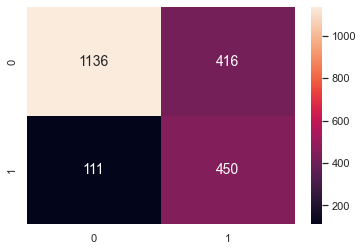

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', annot_kws={'fontsize':14});

#### Treshold : 48.888

In [ ]:
y_pred_ = y_proba[:,1]>=0.48888
y_pred_ = y_pred_.astype('int64')

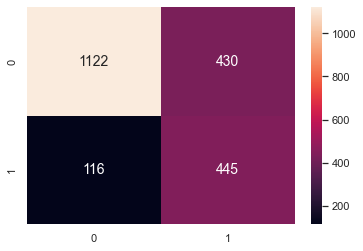

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_), annot=True, fmt='g', annot_kws={'fontsize':14});

In [119]:
xxx = sorted(4*['s', 'r'])
xxx

['r', 'r', 'r', 'r', 's', 's', 's', 's']

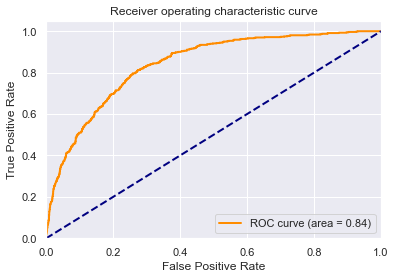

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_proba[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

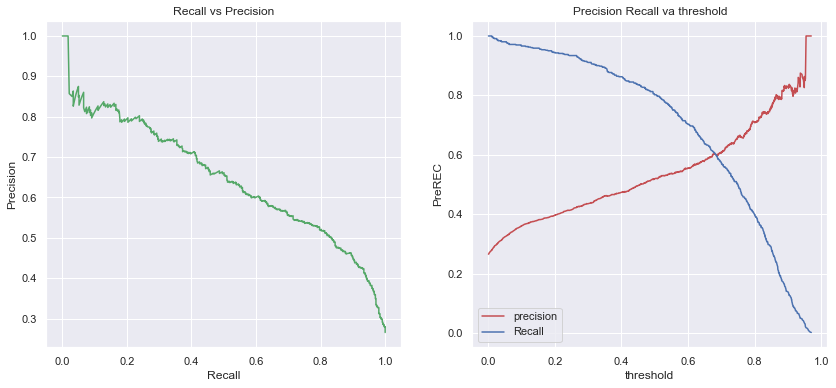

In [ ]:
per, rec, thr=precision_recall_curve(y_test, y_proba[:,1])
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(rec, per, c='g')
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('Recall vs Precision')
#
ax2.plot(thr, per[:-1], c='r', label='precision')
ax2.plot(thr, rec[:-1], c='b', label='Recall')
ax2.set_title('Precision Recall va threshold')
ax2.set_xlabel('threshold')
ax2.set_ylabel('PreREC')
ax2.legend()
plt.show()

## Save the model

In [ ]:
pickle.dump(XGB_model, open('XGB_model.sav', 'wb'))

- Customer demography: Age, Tenure, Gender, Location, Zip code, etc.
- Bill and payment: Monthly fee, Billing amount, Count of overdue payment, payment method, Billing type, etc.
- Network/TV/Phone usage records: Network use frequency, network flow, usage time and period, internet average speed, In-net -  call duration, Call type, etc.
- Customer care/service: Service call number, service type, service duration, account change count
- Competitors information: Offer detail under similar plan, etc

# CLV Analysis

##### CLTV = (Customer Value / Churn Rate) x Profit Margin
##### Customer Value = Average Order Value * Purchase Frequency
##### Average Order Value = Total Price / Total Transaction
##### Purchase Frequency = Total Transaction / Total Number of Customers
##### Churn Rate = 1 - Repeat Rate
##### Repeat Rate = Number of customers making multiple purchases / All customers
##### Profit Margin = Total Price * 0.10

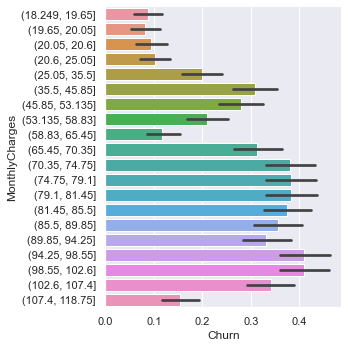

In [ ]:
xx = df[['Churn', 'MonthlyCharges']]
xx['MonthlyCharges'] = pd.qcut(df.loc[:,'MonthlyCharges'], 20)
sns.catplot(x='Churn',y='MonthlyCharges' ,data=xx, kind='bar');

In [ ]:
pd.qcut(df.loc[:,'MonthlyCharges'], 20)

0         (25.05, 35.5]
1       (53.135, 58.83]
2       (53.135, 58.83]
3         (35.5, 45.85]
4        (70.35, 74.75]
             ...       
7038      (81.45, 85.5]
7039     (102.6, 107.4]
7040      (25.05, 35.5]
7041     (70.35, 74.75]
7042     (102.6, 107.4]
Name: MonthlyCharges, Length: 7043, dtype: category
Categories (20, interval[float64, right]): [(18.249, 19.65] < (19.65, 20.05] < (20.05, 20.6] < (20.6, 25.05] ... (94.25, 98.55] < (98.55, 102.6] < (102.6, 107.4] < (107.4, 118.75]]

In [32]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples

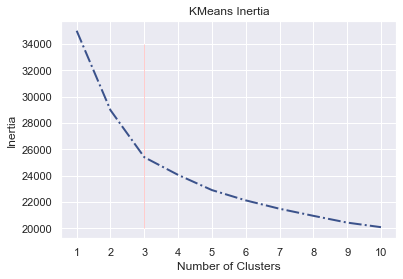

In [33]:
scal = MinMaxScaler()
X_scal = X.copy()
X_scal[continues_features] = scal.fit_transform(X_scal[continues_features])
clust = list(range(1,11))
inertia = []
for n in clust :
    
    model = KMeans(n_clusters=n)
    model.fit(X_scal)
    inert = model.inertia_
    inertia.append(inert)

sns.lineplot(clust, inertia, linewidth =2, linestyle='-.')
sns.lineplot(x=[3,3], y=[20000, 34000], color='red', linewidth =3, linestyle='--')
plt.title('KMeans Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(clust)
plt.show()


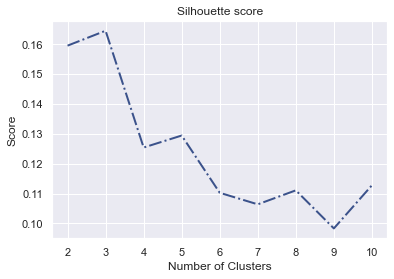

In [34]:
clust = list(range(2,11))
silhoutte = []
for n in clust :
    
    model_km = KMeans(n_clusters=n)
    model_km.fit(X_scal)
    cluster = model_km.labels_
    sil_score = silhouette_score(X_scal, cluster)
    silhoutte.append(sil_score)

sns.lineplot(clust, silhoutte, linewidth =2, linestyle='-.')
plt.title('Silhouette score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

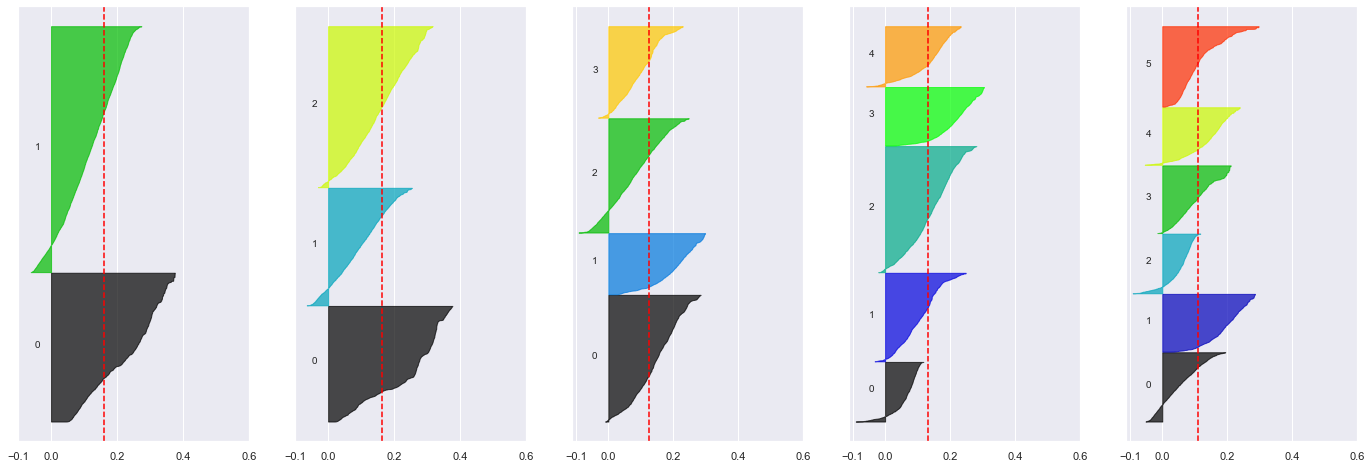

In [35]:
from matplotlib import cm

fig, ax = plt.subplots(1,5, figsize=(24, 8))

for n in range(2, 7) :
    model = KMeans(n_clusters=n)
    model.fit(X_scal)
    label = model.labels_
    silhout_score = silhouette_samples(X_scal, label)
    sil_score = silhouette_score(X_scal, label)

    y_lower = 10
    for i in range(n):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = silhout_score[label == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n)
            ax[n-2].fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )
            ax[n-2].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
    ax[n-2].axvline(x=sil_score, color="red", linestyle="--")        
    ax[n-2].set_yticks([])  # Clear the yaxis labels / ticks
    ax[n-2].set_xticks([-0.1, 0, 0.2, 0.4, 0.6])        

plt.show()       

In [36]:
n = 3
model = KMeans(n_clusters=n, n_init=10,random_state=1234)
model.fit(X_scal)
label = model.labels_
sil_score = silhouette_score(X_scal, label)
print(sil_score)
clust_data = X_scal.copy()
clust_data['label'] = label

0.16451666806356993


In [68]:
pca_model = PCA(n_components=3)
pca = pca_model.fit_transform(clust_data.iloc[:,:-1])

In [38]:
pca_model.explained_variance_

array([1.16110656, 0.77443842])

In [70]:
pca_arr = np.concatenate((pca, label.reshape(7043,1)), axis=1)
pca_df = pd.DataFrame(pca_arr, columns=['P1', 'P2', 'P3','label'])
pca_df

,P1,P2,P3,label
0,-0.440337,-0.804747,-0.414039,1.0
1,-0.710229,0.358750,1.010417,2.0
2,-0.627096,-0.598403,0.656481,1.0
3,-0.385029,0.771861,1.216814,0.0
4,0.035185,-1.552486,-0.017464,1.0
...,...,...,...,...
7038,0.547365,1.134843,-0.015254,0.0
7039,1.557102,0.981408,-0.418500,0.0
7040,-0.556794,-0.490617,-0.851801,1.0
7041,0.103356,-0.993426,-0.588879,1.0


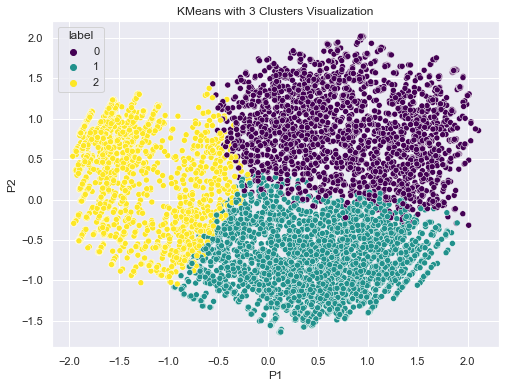

In [133]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df['P1'], y=pca_df['P2'], hue=pca_df['label'].astype('int'), data=pca_df, palette='viridis')
plt.title('KMeans with 3 Clusters Visualization')
plt.show()

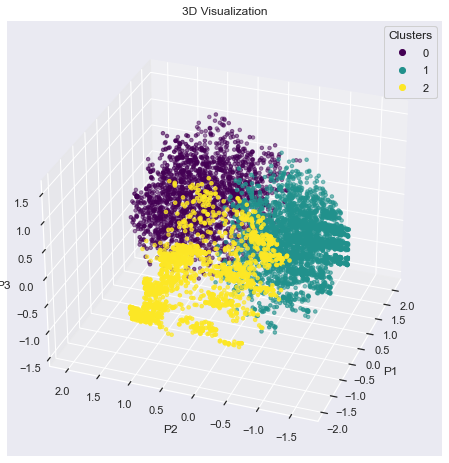

In [132]:
from mpl_toolkits.mplot3d import Axes3D
fig= plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection = '3d')
scatter = ax.scatter(pca_df['P1'], pca_df['P2'], pca_df['P3'], c=pca_df['label'], marker=".", s=50 ,cmap='viridis', label=[0,1,2])
ax.set_title('3D Visualization')
ax.set_xlabel('P1')
ax.set_ylabel('P2')
ax.set_zlabel('P3')
ax.view_init(30, 200)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)
plt.show()

In [64]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,56.95,1889.50,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,42.30,1840.75,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,2,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [42]:
labeled_df = df.copy()
labeled_df['Clusters'] = label
labeled_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Clusters
0,0,0,1,0,1,0,0,1,0,1,...,29.85,0,1,0,0,0,0,1,0,1
1,1,0,0,0,34,1,0,1,1,0,...,1889.50,0,0,1,0,0,0,0,1,2
2,1,0,0,0,2,1,0,1,1,1,...,108.15,1,1,0,0,0,0,0,1,1
3,1,0,0,0,45,0,0,1,1,0,...,1840.75,0,0,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,2,0,0,...,151.65,1,1,0,0,0,0,1,0,1


In [43]:
labeled_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Clusters'],
      dtype='object')

In [44]:
import plotly.express as px

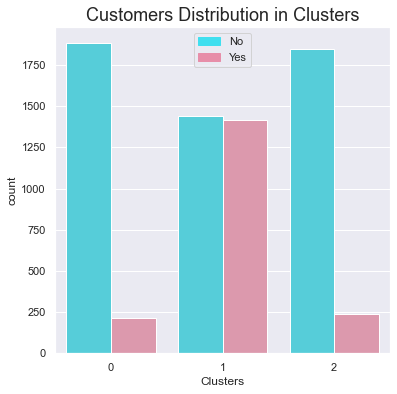

In [65]:
fig, ax = plt.subplots(figsize=(6,6))
#fig.set_facecolor('black')
ax = sns.countplot(labeled_df['Clusters'], hue=labeled_df['Churn'], palette=color_0_1)
ax.set_title('Customers Distribution in Clusters', fontdict={'size':18})
ax.legend(['No', 'Yes'])
leg = ax.get_legend()
leg.legendHandles[0].set_color('#40DFEF')
leg.legendHandles[1].set_color('#E78EA9')


In [46]:
df['Churn'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: Churn, dtype: float64

In [47]:
label_churn = labeled_df.groupby('Clusters')['Churn'].value_counts(normalize=True).round(2).to_frame().rename(columns={'Churn': '%Churn'}).reset_index()
label_churn['%Churn'] = label_churn['%Churn'] * 100
label_churn

,Clusters,Churn,%Churn
0,0,0,90.0
1,0,1,10.0
2,1,0,50.0
3,1,1,50.0
4,2,0,89.0
5,2,1,11.0


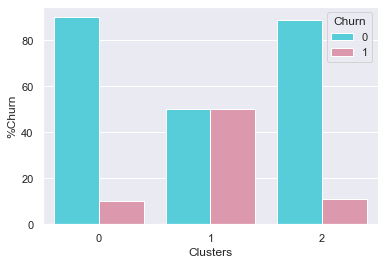

In [48]:
sns.barplot(x='Clusters', y='%Churn', data=label_churn, hue='Churn', palette=color_0_1);

In [49]:
agg_df_MonCharg = labeled_df.groupby(['Churn','Clusters'])['MonthlyCharges'].agg(('count','mean', 'sum')).round()
agg_df_MonCharg.reset_index(inplace=True)
agg_df_MonCharg

,Churn,Clusters,count,mean,sum
0,0,0,1885,85.0,159664.0
1,0,1,1440,75.0,107644.0
2,0,2,1849,27.0,49678.0
3,1,0,212,94.0,19848.0
4,1,1,1418,79.0,111436.0
5,1,2,239,33.0,7847.0


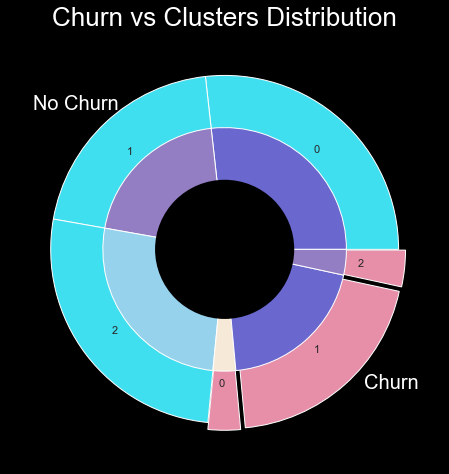

In [50]:
fig, ax = plt.subplots(figsize=(8,8))
fig.patch.set_facecolor('black')
ax.pie(agg_df_MonCharg['count'], radius=1, explode=sorted(n*[0, 0.04]),colors=sorted(n*['#40DFEF', '#E78EA9']))
ax.pie(agg_df_MonCharg['count'], labels=agg_df_MonCharg['Clusters'], 
       radius=0.7, colors=['#6A67CE','#947EC3','#97D2EC', '#F7E9D7'])
ax.add_artist(plt.Circle((0,0), 0.4, color='white', fc='black', linewidth=0))
ax.set_title('Churn vs Clusters Distribution', color='white',fontsize=26)       
ax.text(x=-1.1 ,y=.8, s='No Churn',fontsize=20, color='w')
ax.text(x=.8 ,y=-.8, s='Churn',fontsize=20, color='w');

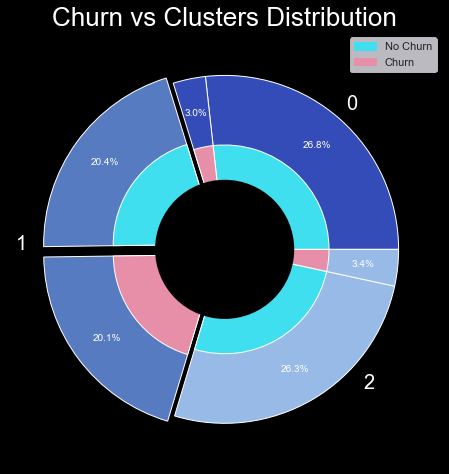

In [51]:
df_MonCharg = agg_df_MonCharg.copy()
df_MonCharg.sort_values(by='Clusters', inplace=True)
# color = ['#9C9EFE','#7895B2','#607EAA', '#182747']
color = ['#577BC1','#344CB7','#98BAE7', '#B8E4F0']
fig, ax = plt.subplots(figsize=(8,8))
fig.patch.set_facecolor('black')
ax.pie(df_MonCharg['count'], radius=1, colors=sorted(2*color), autopct='%1.1f%%',
       pctdistance=.8, textprops={'color':"white"}, explode=[0,0,.05,.05,0,0])
ax.pie(df_MonCharg['count'],radius=.6, colors=['#40DFEF', '#E78EA9'],explode=[0,0,.05,.05,0,0])
ax.add_artist(plt.Circle((0,0), 0.4, color='white', fc='black', linewidth=0))
ax.set_title('Churn vs Clusters Distribution', color='white',fontsize=26)  
ax.text(x=.7 ,y=.8, s='0',fontsize=20, color='w')     
ax.text(x=-1.2 ,y=0, s='1',fontsize=20, color='w')
ax.text(x=.8 ,y=-.8, s='2',fontsize=20, color='w')
ax.legend(['No Churn', 'Churn']);
leg = ax.get_legend()
leg.legendHandles[0].set_color('#40DFEF')
leg.legendHandles[1].set_color('#E78EA9')

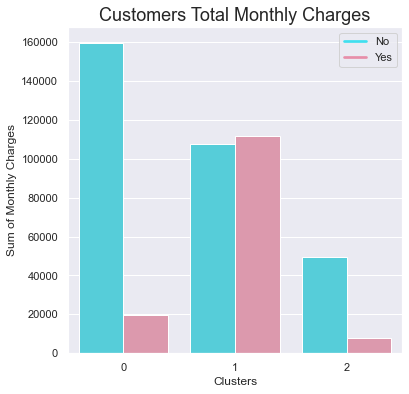

In [137]:
fig, ax = plt.subplots(figsize=(6,6))
fig.set_facecolor('white')
ax = sns.barplot(x='Clusters', y='sum', data= df_MonCharg, hue='Churn', palette=color_0_1)
ax.set_title('Customers Total Monthly Charges', fontdict={'size':18})
ax.set_ylabel('Sum of Monthly Charges')
ax.legend(['No', 'Yes'])
leg = ax.get_legend()
leg.legendHandles[0].set_color('#40DFEF')
leg.legendHandles[1].set_color('#E78EA9')

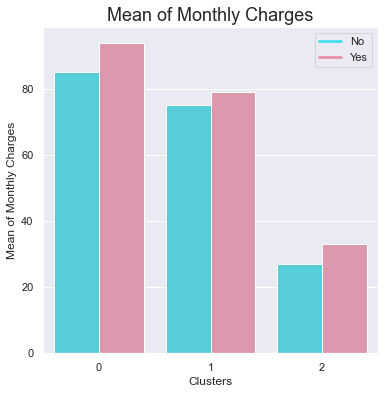

In [139]:
fig, ax = plt.subplots(figsize=(6,6))
fig.set_facecolor('white')
ax = sns.barplot(x='Clusters', y='mean', data= df_MonCharg, hue='Churn', palette=color_0_1)
ax.set_title('Mean of Monthly Charges', fontdict={'size':18})
ax.set_ylabel('Mean of Monthly Charges')
ax.legend(['No', 'Yes'])
leg = ax.get_legend()
leg.legendHandles[0].set_color('#40DFEF')
leg.legendHandles[1].set_color('#E78EA9')

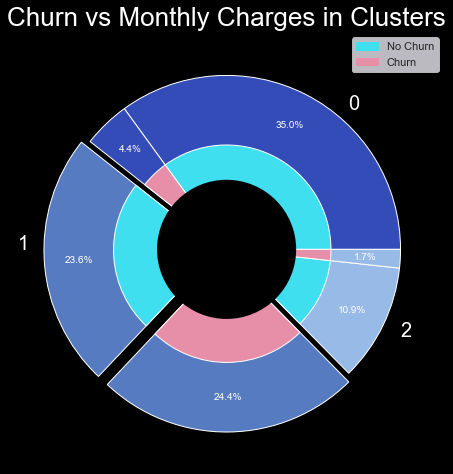

In [53]:
df_MonCharg = agg_df_MonCharg.copy()
df_MonCharg.sort_values(by='Clusters', inplace=True)
# color = ['#9C9EFE','#7895B2','#607EAA', '#182747']
color = ['#577BC1','#344CB7','#98BAE7', '#B8E4F0']
fig, ax = plt.subplots(figsize=(8,8))
fig.patch.set_facecolor('black')
ax.pie(df_MonCharg['sum'], radius=1, colors=sorted(2*color), autopct='%1.1f%%',
       pctdistance=.8,textprops={'color':"white"}, explode=[0,0,.05,.05,0,0])
ax.pie(df_MonCharg['sum'],radius=.6, colors=['#40DFEF', '#E78EA9'],explode=[0,0,.05,.05,0,0])
ax.add_artist(plt.Circle((0,0), 0.4, color='white', fc='black', linewidth=0))
ax.set_title('Churn vs Monthly Charges in Clusters', color='white',fontsize=26)  
ax.text(x=.7 ,y=.8, s='0',fontsize=20, color='w')     
ax.text(x=-1.2 ,y=0, s='1',fontsize=20, color='w')
ax.text(x=1 ,y=-.5, s='2',fontsize=20, color='w')
ax.legend(['No Churn', 'Churn']);
leg = ax.get_legend()
leg.legendHandles[0].set_color('#40DFEF')
leg.legendHandles[1].set_color('#E78EA9')

In [54]:

fig = px.bar(agg_df_MonCharg, x='Clusters', y='sum', color = agg_df_MonCharg['Churn'].astype('str'), width=500, height=400, 
             color_discrete_map = {'0':color_0_1[0],'1':color_0_1[1]},
             labels={'sum':'Sum of Monthly Charges', 'color': 'Churn'})       
fig.show()

In [55]:
labeled_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Clusters'],
      dtype='object')

In [152]:
count_agg_df = labeled_df.groupby(['Churn','Clusters'])[['Contract_Month-to-month', 'Contract_One year',
                                                        'Contract_Two year','InternetService','PaymentMethod_Electronic check', 
                                                        'TechSupport','SeniorCitizen','PaymentMethod_Credit card (automatic)', 'PaperlessBilling']].agg(('sum'))
count_agg_df = count_agg_df.reset_index()
count_agg_df

,Churn,Clusters,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService,PaymentMethod_Electronic check,TechSupport,SeniorCitizen,PaymentMethod_Credit card (automatic),PaperlessBilling
0,0,0,123.0,792.0,970.0,2759,362.0,1278,262,662.0,1173
1,0,1,1393.0,44.0,3.0,2365,809.0,316,335,235.0,1051
2,0,2,704.0,471.0,674.0,436,123.0,140,69,393.0,547
3,1,0,31.0,140.0,41.0,365,71.0,115,40,60.0,159
4,1,1,1408.0,9.0,1.0,2562,983.0,170,419,142.0,1151
5,1,2,216.0,17.0,6.0,126,17.0,25,17,30.0,90


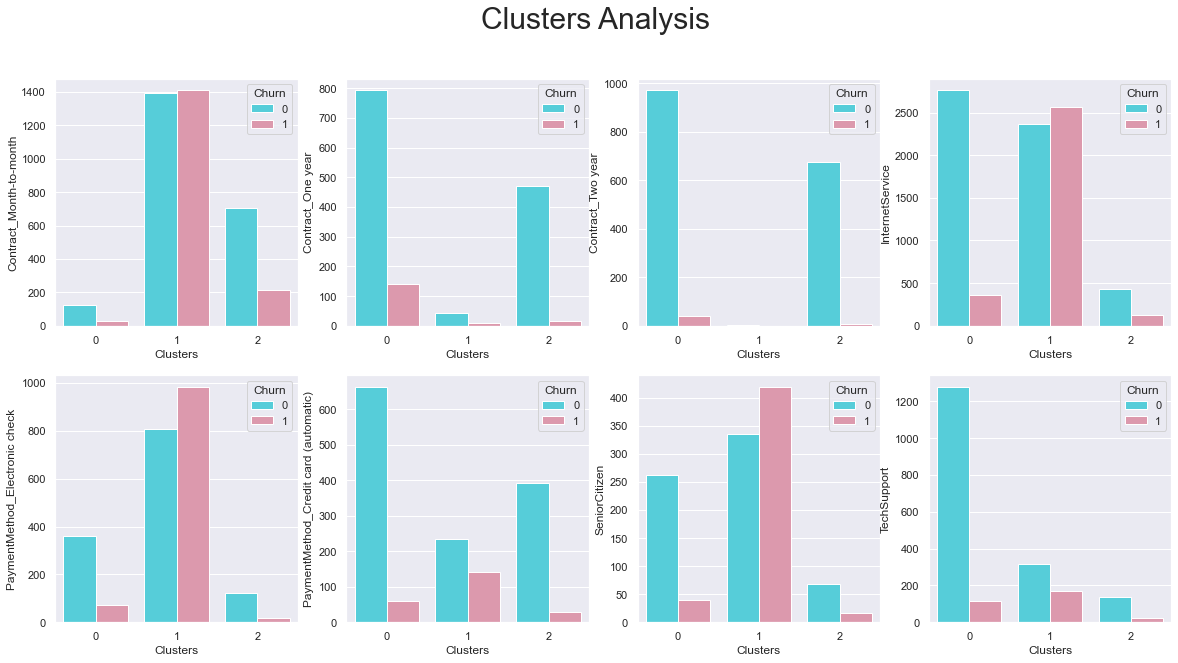

In [154]:
fig, ax = plt.subplots(2,4,figsize=(20,10))
sns.set_palette(color_0_1)

ax = ax.flatten()
sns.barplot(data=count_agg_df, x='Clusters', y='Contract_Month-to-month', hue='Churn', ax=ax[0])
sns.barplot(data=count_agg_df, x='Clusters', y='Contract_One year', hue='Churn', ax=ax[1])
sns.barplot(data=count_agg_df, x='Clusters', y='Contract_Two year', hue='Churn', ax=ax[2])
sns.barplot(data=count_agg_df, x='Clusters', y='InternetService', hue='Churn', ax=ax[3])
sns.barplot(data=count_agg_df, x='Clusters', y='PaymentMethod_Electronic check', hue='Churn', ax=ax[4])
sns.barplot(data=count_agg_df, x='Clusters', y='PaymentMethod_Credit card (automatic)', hue='Churn', ax=ax[5])
sns.barplot(data=count_agg_df, x='Clusters', y='SeniorCitizen', hue='Churn', ax=ax[6])
sns.barplot(data=count_agg_df, x='Clusters', y='TechSupport', hue='Churn', ax=ax[7])
fig.suptitle('Clusters Analysis', fontsize=30)
plt.show()

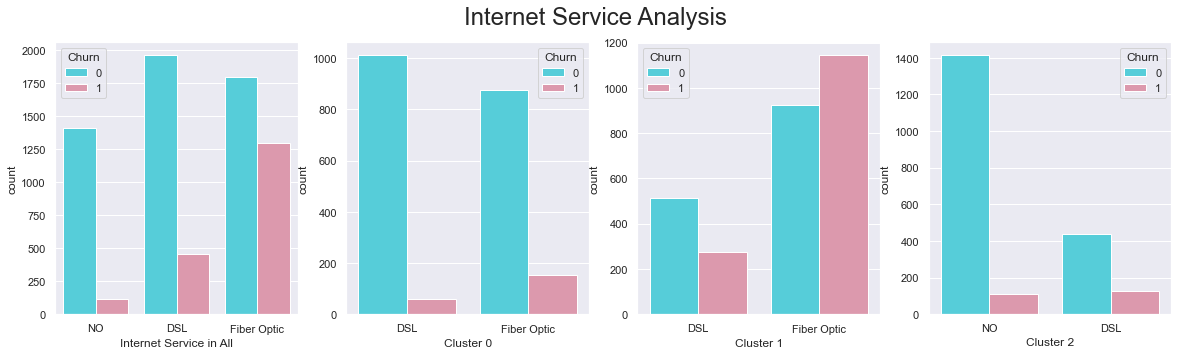

In [58]:
fig, ax = plt.subplots(1,4, figsize=(20,5))
sns.countplot(x='InternetService', data=labeled_df, hue='Churn', ax=ax[0])
ax[0].set_xlabel('Internet Service in All')
ax[0].set_xticks([0, 1, 2], ['NO', 'DSL', 'Fiber Optic'])
sns.countplot(x='InternetService', data=labeled_df[labeled_df.Clusters==0], hue='Churn', ax=ax[1])
ax[1].set_xlabel('Cluster 0')
ax[1].set_xticks([ 0, 1], ['DSL', 'Fiber Optic'])
sns.countplot(x='InternetService', data=labeled_df[labeled_df.Clusters==1], hue='Churn', ax=ax[2])
ax[2].set_xlabel('Cluster 1')
ax[2].set_xticks([ 0, 1], ['DSL', 'Fiber Optic'])
sns.countplot(x='InternetService', data=labeled_df[labeled_df.Clusters==2], hue='Churn', ax=ax[3])
ax[3].set_xlabel('Cluster 2')
ax[3].set_xticks([ 0, 1], ['NO','DSL'])
fig.suptitle('Internet Service Analysis', fontsize=24);

In [59]:
agg_df_totCharg = labeled_df.groupby(['Churn','Clusters'])['TotalCharges'].agg(('count','mean', 'sum')).round()
agg_df_totCharg.reset_index(inplace=True)
agg_df_totCharg

,Churn,Clusters,count,mean,sum
0,0,0,1885,4820.0,9085913.0
1,0,1,1440,1883.0,2711795.0
2,0,2,1849,768.0,1420650.0
3,1,0,212,4908.0,1040409.0
4,1,1,1418,1243.0,1762981.0
5,1,2,239,249.0,59537.0


In [60]:
fig = px.bar(agg_df_totCharg, x='Clusters', y='sum', color = agg_df_totCharg['Churn'].astype('str'), width=500, height=400, 
             color_discrete_map = {'0':color_0_1[0],'1':color_0_1[1]}, title='Sum of Total Charges in Clusters',
             labels={ 'sum':'Sum of Total Charges', 'color': 'Churn'})       
fig.show()

In [61]:
agg_df_tenure = labeled_df.groupby(['Churn','Clusters'])['tenure'].agg(('count','mean', 'sum')).round()
agg_df_tenure.reset_index(inplace=True)
agg_df_tenure

,Churn,Clusters,count,mean,sum
0,0,0,1885,56.0,105228
1,0,1,1440,24.0,34426
2,0,2,1849,30.0,54733
3,1,0,212,51.0,10904
4,1,1,1418,15.0,20831
5,1,2,239,8.0,1868


In [150]:
df["Contract_Month-to-month"].value_counts(normalize=True)

1    0.550192
0    0.449808
Name: Contract_Month-to-month, dtype: float64

In [62]:
fig = px.bar(agg_df_tenure, x='Clusters', y='mean', color = agg_df_tenure['Churn'].astype('str'), width=500, height=400, 
             color_discrete_map = {'0':color_0_1[0],'1':color_0_1[1]}, barmode='group', title='Mean of Tenure in Clusters',
             labels={ 'mean':'Mean of Tenure', 'color': 'Churn'})       
fig.show()

In [63]:
fig = px.bar(agg_df_tenure, x='Clusters', y='sum', color = agg_df_tenure['Churn'].astype('str'), width=500, height=400, 
             color_discrete_map = {'0':color_0_1[0],'1':color_0_1[1]}, barmode='group',
             labels={ 'sum':'Sum of Tenure', 'color': 'Churn'})       
fig.show()